# Actividad: Red Convolucional con Keras (Fashion MNIST)

En esta actividad vas a diseñar **tu propia red neuronal convolucional (CNN)** usando Keras.

## Contexto del problema

Imagina que trabajas para una **tienda online de ropa**. Cada vez que llega una nueva prenda,
el sistema hace una foto en blanco y negro y quiere **clasificar automáticamente** de qué tipo de prenda se trata:
camiseta, pantalón, vestido, abrigo, etc.

Tu misión es:

- Construir una **red convolucional** capaz de reconocer estas prendas a partir de las imágenes.
- Elegir tú mismo:
  - Cuántas capas de convolución usar.
  - Cuántos filtros y de qué tamaño.
  - Qué funciones de activación.
  - Qué optimizador, función de pérdida y métricas.
- Entrenar el modelo y **ponerlo a prueba** con ejemplos reales del conjunto de test.

Usaremos el dataset **Fashion MNIST**, que viene ya incluido en Keras.


## 1. Cargar librerías y comprobar el entorno

En esta celda importamos las librerías que vamos a usar y comprobamos que tenemos
TensorFlow y Keras disponibles.


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers
from keras.utils import plot_model

print("Python:", sys.executable)
print("TensorFlow:", tf.__version__)
print("Keras:", keras.__version__)

# Estilo de gráficos (si no existe el estilo, usamos uno básico)
try:
    plt.style.use("seaborn-v0_8")
except OSError:
    plt.style.use("seaborn")

Python: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
TensorFlow: 2.19.0
Keras: 3.10.0


## 2. Cargar el dataset: Fashion MNIST

Vamos a usar el conjunto de datos **Fashion MNIST**, que contiene imágenes
en escala de grises de **28×28 píxeles** de distintas prendas de ropa.

- 60.000 imágenes para entrenamiento.
- 10.000 imágenes para test.
- 10 clases (camiseta, pantalón, jersey, vestido, abrigo, sandalia, camisa, zapatilla, bolso, bota).

Primero cargamos los datos desde Keras.


In [2]:
# Carga del dataset Fashion MNIST
(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = keras.datasets.fashion_mnist.load_data()

print("Tamaño de x_train:", fashion_x_train.shape)
print("Tamaño de y_train:", fashion_y_train.shape)
print("Tamaño de x_test:", fashion_x_test.shape)
print("Tamaño de y_test:", fashion_y_test.shape)

# Nombres de las clases (para visualización)
class_names = [
    "Camiseta/Top", "Pantalón", "Jersey", "Vestido",
    "Abrigo", "Sandalia", "Camisa", "Zapatilla",
    "Bolso", "Bota"
]

Tamaño de x_train: (60000, 28, 28)
Tamaño de y_train: (60000,)
Tamaño de x_test: (10000, 28, 28)
Tamaño de y_test: (10000,)


## 3. Análisis Exploratorio de Datos (EDA)

En esta sección vamos a explorar un poco el dataset antes de crear la red.

### Tareas (hazlas tú en el código de abajo):

1. **Comprobar valores mínimos y máximos** de los píxeles (deberían estar entre 0 y 255).
2. Visualizar la **distribución de clases** en `fashion_y_train` (por ejemplo, con un histograma).
3. Mostrar una cuadrícula (por ejemplo, 3×3) de imágenes de entrenamiento con su etiqueta.

> Puedes usar como referencia el EDA del cuaderno de la red totalmente conectada.


Valor mínimo en fashion_x_train: 0
Valor máximo en fashion_x_train: 255


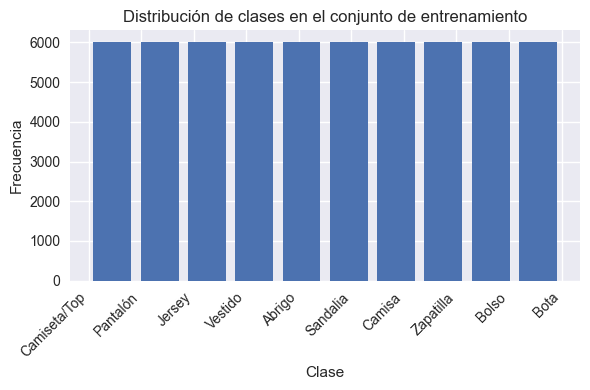

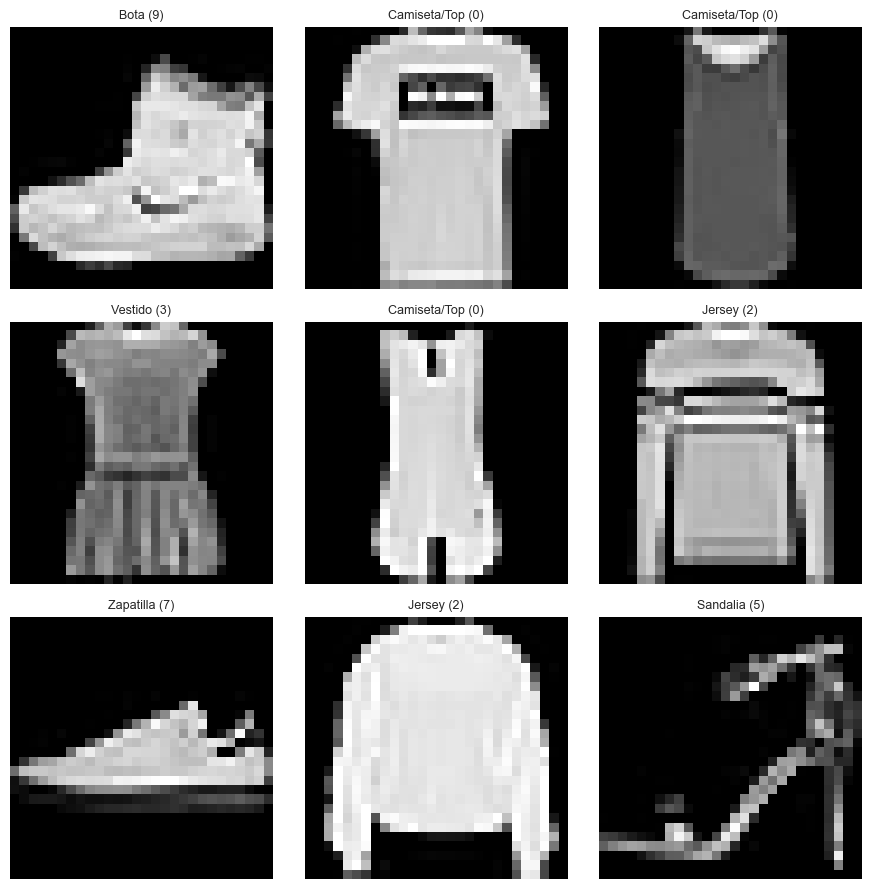

In [3]:
# 3.1: Mostrar valores mínimo y máximo de los píxeles

print("Valor mínimo en fashion_x_train:", np.min(fashion_x_train))
print("Valor máximo en fashion_x_train:", np.max(fashion_x_train))

# 3.2: Distribución de clases en el conjunto de entrenamiento

plt.figure(figsize=(6,4))
plt.hist(fashion_y_train, bins=10, rwidth=0.8)
plt.xticks(range(10), class_names, rotation=45, ha="right")
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 3.3: Mostrar algunas imágenes de ejemplo con su etiqueta

plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(fashion_x_train[i], cmap="gray")
    label = fashion_y_train[i]
    plt.title(f"{class_names[label]} ({label})", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

## 4. Preparar los datos para la red convolucional

Las redes convolucionales esperan las imágenes con una **dimensión de canales**.
En este caso, nuestras imágenes son de 28×28 y tienen **1 canal** (escala de grises).

Pasos:

1. **Normalizar** los píxeles a valores entre 0 y 1 dividiendo entre 255.
2. Añadir la dimensión de canales para obtener un tensor de forma `(num_imágenes, 28, 28, 1)`.
3. Crear un pequeño conjunto de **validación** a partir del conjunto de entrenamiento.


In [4]:
# 4.1: Normalización
X_train = fashion_x_train.astype("float32") / 255.0
X_test = fashion_x_test.astype("float32") / 255.0

# 4.2: Añadir dimensión de canales (escala de grises -> 1 canal)
# Forma original: (num_imágenes, 28, 28)
# Nueva forma:    (num_imágenes, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Nueva forma de X_train:", X_train.shape)
print("Nueva forma de X_test:", X_test.shape)

# 4.3: Crear conjunto de validación (por ejemplo, las primeras 7.500 imágenes)
X_val = X_train[:7500]
y_val = fashion_y_train[:7500]

X_train_small = X_train[7500:]
y_train_small = fashion_y_train[7500:]

print("X_train_small:", X_train_small.shape)
print("X_val:", X_val.shape)

Nueva forma de X_train: (60000, 28, 28, 1)
Nueva forma de X_test: (10000, 28, 28, 1)
X_train_small: (52500, 28, 28, 1)
X_val: (7500, 28, 28, 1)


## 5. Diseñar la red convolucional (ACTIVIDAD PRINCIPAL)

Ahora llega la parte importante: **tú vas a definir la red convolucional**.

### Requisitos mínimos de la red

- Usar al menos **2 capas de convolución** (`Conv2D`).
- Usar capas de **submuestreo** (`MaxPooling2D`) para reducir el tamaño de las imágenes intermedias. Fuente: https://keras.io/api/layers/pooling_layers/max_pooling2d/
- Añadir una capa `Flatten` para pasar de mapas de características 2D a un vector 1D.
- Añadir una o dos capas `Dense` finales:
  - Una capa de salida con **10 neuronas** y activación `softmax` (10 clases).

### Pistas

- Recuerda que la forma de entrada es `(28, 28, 1)`.
- Recuerda que la salida debe tener 10 neuronas porque tenemos 10 clases.

En el siguiente bloque de código tienes una plantilla. **Completa tú las capas.**


In [5]:
# 5.1: Definir el modelo CNN
# COMPLETA ESTA PLANTILLA AÑADIENDO LAS CAPAS QUE CONSIDERES

model = keras.Sequential(name="mi_cnn_fashion_mnist")

# Capa de entrada + primera convolución
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPool2D((2, 2)))

# Segunda capa de convolución + max pooling
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPool2D((2, 2)))

# (Opcional) tercera convolución para extraer características más complejas
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))

# Aplanar y capas densas finales
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.5))  # para reducir sobreajuste
model.add(layers.Dense(10, activation="softmax"))  # 10 clases de ropa

# Al final, mostrar el resumen del modelo
model.summary()


Model: "mi_cnn_fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,906 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Compilar el modelo: optimizador, función de pérdida y métricas

Ahora tienes que **compilar** tu modelo eligiendo:

- Un **optimizador**.
- Una **función de pérdida** adecuada para clasificación multiclase:
  - Normalmente: `"sparse_categorical_crossentropy"` (etiquetas 0–9 como enteros).
- Las **métricas** que quieres monitorizar.

> Recuerda la guía de la unidad 3.2: “Montando una red neuronal”.


In [6]:
# 6.1: Compilar el modelo
# COMPLETA ESTOS PARÁMETROS

optimizer_name = "adam"  # TODO: prueba a cambiarlo por 'sgd', 'rmsprop', etc.
loss_name = "sparse_categorical_crossentropy"
metrics_list = ["accuracy"]  # puedes añadir más métricas si quieres

model.compile(
    optimizer=optimizer_name,
    loss=loss_name,
    metrics=metrics_list
)


## 7. Entrenar la red convolucional

Ahora vamos a entrenar tu CNN con los datos de entrenamiento.

Parámetros a elegir:

- `epochs`: cuántas veces recorre todo el conjunto de entrenamiento (por ejemplo, 5, 10, 15…).
- `batch_size`: tamaño del lote (por ejemplo, 32, 64…).

**Actividad:** elige unos valores iniciales, entrena el modelo y luego vuelve a entrenar
con otros valores para comparar resultados.


In [7]:
# 7.1: Entrenamiento del modelo

epochs = 10       # puedes subirlo a 15–20 si ves que no sobreajusta
batch_size = 128  # tamaño de lote típico para este tipo de problema

history = model.fit(
    X_train_small, y_train_small,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6870 - loss: 0.8566 - val_accuracy: 0.8739 - val_loss: 0.3471
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8578 - loss: 0.3968 - val_accuracy: 0.8943 - val_loss: 0.2887
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8872 - loss: 0.3195 - val_accuracy: 0.9019 - val_loss: 0.2707
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8998 - loss: 0.2840 - val_accuracy: 0.9144 - val_loss: 0.2367
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9095 - loss: 0.2515 - val_accuracy: 0.9144 - val_loss: 0.2298
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9177 - loss: 0.2355 - val_accuracy: 0.9179 - val_loss: 0.2200
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9231 - loss: 0.2139 - val_accuracy: 0.9275 - val_loss: 0.2061
Epoch 8/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9295 - loss: 0.1997 - val_accuracy: 0.

## 8. Visualizar la evolución del entrenamiento

Vamos a dibujar:

- La **pérdida** (loss) de entrenamiento y validación por epoch.
- La **accuracy** de entrenamiento y validación por epoch.

Observa si tu modelo:

- Aprende poco (las curvas se quedan altas).
- Sobreajusta (train muy bien, val empeora).


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


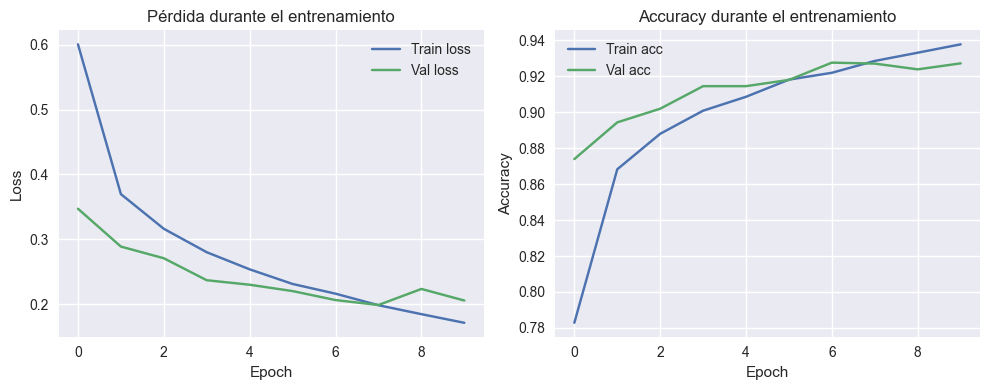

In [8]:
history_dict = history.history
print(history_dict.keys())

plt.figure(figsize=(10,4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history_dict["loss"], label="Train loss")
plt.plot(history_dict["val_loss"], label="Val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Pérdida durante el entrenamiento")
plt.legend()
plt.grid(True)

# Accuracy (si existe)
if "accuracy" in history_dict:
    plt.subplot(1, 2, 2)
    plt.plot(history_dict["accuracy"], label="Train acc")
    plt.plot(history_dict["val_accuracy"], label="Val acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy durante el entrenamiento")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

## 9. Evaluar el modelo en el conjunto de test

Ahora vamos a evaluar tu modelo con el conjunto de test, que son datos que el modelo
**no ha visto nunca** (ni para entrenar ni para validar).

Piensa en esto como el **examen final** del modelo.


In [9]:
test_loss, test_acc = model.evaluate(X_test, fashion_y_test, verbose=0)

print(f"Pérdida en test: {test_loss:.4f}")
print(f"Accuracy en test: {test_acc:.4f}")

Pérdida en test: 0.2291
Accuracy en test: 0.9172


## 10. Poner a prueba tu red con una imagen concreta

En esta sección podrás elegir **una imagen concreta** del conjunto de test y pedirle
a tu red que haga una predicción.

### Actividad

1. Cambia el valor de `idx` para elegir otra imagen.
2. Mira la imagen, la etiqueta real y la predicción.
3. Prueba varias veces con aciertos y con fallos.


Índice de la imagen: 0
Etiqueta real     => 9 (Bota)
Predicción modelo => 9 (Bota)


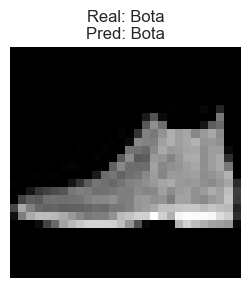

Índice de la imagen: 1
Etiqueta real     => 2 (Jersey)
Predicción modelo => 2 (Jersey)


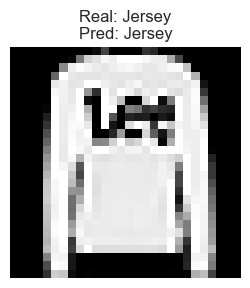

Índice de la imagen: 2
Etiqueta real     => 1 (Pantalón)
Predicción modelo => 1 (Pantalón)


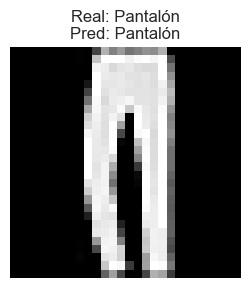

Índice de la imagen: 3
Etiqueta real     => 1 (Pantalón)
Predicción modelo => 1 (Pantalón)


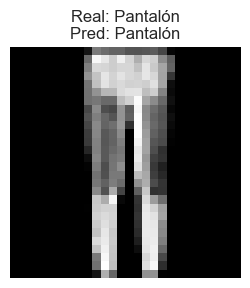

Índice de la imagen: 4
Etiqueta real     => 6 (Camisa)
Predicción modelo => 6 (Camisa)


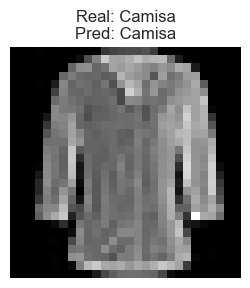

Índice de la imagen: 5
Etiqueta real     => 1 (Pantalón)
Predicción modelo => 1 (Pantalón)


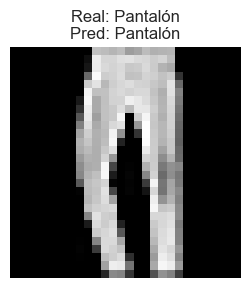

Índice de la imagen: 6
Etiqueta real     => 4 (Abrigo)
Predicción modelo => 4 (Abrigo)


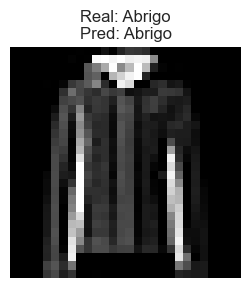

Índice de la imagen: 7
Etiqueta real     => 6 (Camisa)
Predicción modelo => 6 (Camisa)


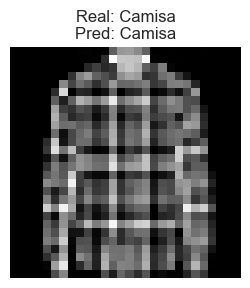

Índice de la imagen: 8
Etiqueta real     => 5 (Sandalia)
Predicción modelo => 5 (Sandalia)


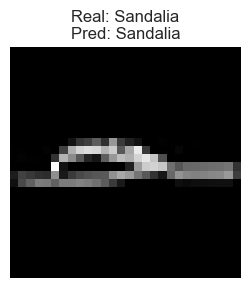

Índice de la imagen: 9
Etiqueta real     => 7 (Zapatilla)
Predicción modelo => 7 (Zapatilla)


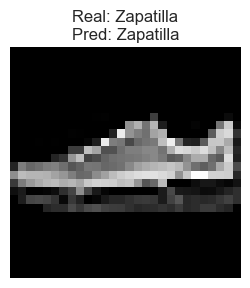

Índice de la imagen: 10
Etiqueta real     => 4 (Abrigo)
Predicción modelo => 4 (Abrigo)


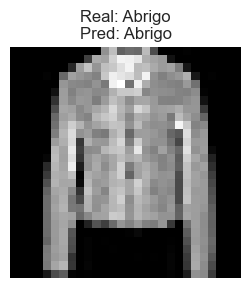

Índice de la imagen: 11
Etiqueta real     => 5 (Sandalia)
Predicción modelo => 5 (Sandalia)


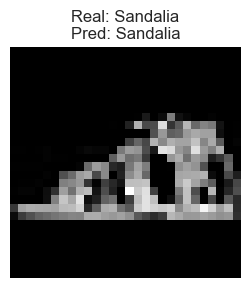

Índice de la imagen: 12
Etiqueta real     => 7 (Zapatilla)
Predicción modelo => 5 (Sandalia)


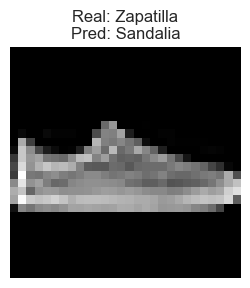

Índice de la imagen: 13
Etiqueta real     => 3 (Vestido)
Predicción modelo => 3 (Vestido)


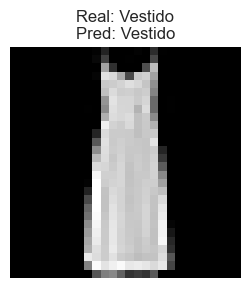

Índice de la imagen: 14
Etiqueta real     => 4 (Abrigo)
Predicción modelo => 4 (Abrigo)


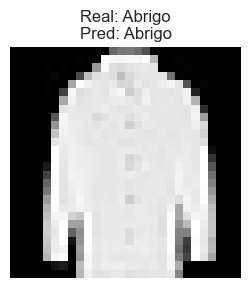

In [10]:
# Función auxiliar para probar una imagen concreta
def probar_imagen(idx):
    if idx < 0 or idx >= len(X_test):
        print(f"Índice fuera de rango. Debe estar entre 0 y {len(X_test)-1}.")
        return
    
    # Preparamos la imagen para el modelo (ya está normalizada y con canal)
    img_modelo = X_test[idx].reshape(1, 28, 28, 1)
    pred_probs = model.predict(img_modelo, verbose=0)
    pred_clase = np.argmax(pred_probs, axis=1)[0]
    true_clase = fashion_y_test[idx]

    print(f"Índice de la imagen: {idx}")
    print(f"Etiqueta real     => {true_clase} ({class_names[true_clase]})")
    print(f"Predicción modelo => {pred_clase} ({class_names[pred_clase]})")

    # Mostramos la imagen original (en escala de grises 28x28)
    plt.figure(figsize=(3,3))
    plt.imshow(fashion_x_test[idx], cmap="gray")
    plt.title(f"Real: {class_names[true_clase]}\nPred: {class_names[pred_clase]}")
    plt.axis("off")
    plt.show()

# Ejemplo: probar una imagen con índice 0 (cámbialo y vuelve a ejecutar)
idx = 0  # TODO: cambia este número para probar otras imágenes
for idx in range(15):
    probar_imagen(idx)
    idx+1

## Responde a las siguientes preguntas usando texto y, si lo ves útil, capturas de tus gráficas/resultados.

1. **Forma de las curvas de entrenamiento**
   - Observa las gráficas de *loss* y *accuracy* (train vs validation).
   - ¿Tu modelo parece **infrentrenado** (underfitting), **sobreajustado** (overfitting) o razonablemente equilibrado?  
   - Justifica tu respuesta usando lo que ves en las curvas (por ejemplo: se separan mucho, se quedan muy altas, etc.).

2. **Análisis del resultado en test**
   - ¿Qué valor de *accuracy en test* has obtenido?  

3. **Interpretación de la arquitectura**
   Explica con tus palabras (sin tecnicismos excesivos, ni IA Generativa) qué aporta cada bloque principal de tu red:
   - Capas **Convolucionales**: ¿qué “trabajo” hacen sobre la imagen?
   - Capa **Flatten**: ¿para qué sirve en el flujo de datos?
   - Capas **Dense** finales: ¿qué papel juegan en la decisión de la clase?

4. **Mejoras posibles del modelo**
   Imagina que tienes que **mejorar el modelo sin cambiar de dataset**. Propón al menos **dos cambios** que probarías y explica por qué podrían ayudar.

5. **Reflexión sobre train / validation / test**
   - ¿Por qué no es buena idea usar solo **train y test** sin conjunto de validación cuando estamos ajustando hiperparámetros?